In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


In [25]:
mv=np.genfromtxt('cumulos_globulares.dat',skip_header=1,usecols=6,unpack='True')

In [26]:
p=np.isnan(mv)
u=mv[~p]




In [34]:
N=input('Ingrese el numero de reciclados: ')
alp=float(input('Ingrese el alpha del intervalo de confianza: '))

Ingrese el numero de reciclados: 2000
Ingrese el alpha del intervalo de confianza: 0.5


In [35]:
med=[]


In [36]:
for i in range (N):
    x=np.random.choice(u,replace='True',size=148)
    med.append(np.mean(x))

In [37]:
promed=np.mean(med)

In [38]:
dst=np.std(med)


In [39]:
alp1=st.norm.ppf(alp/2.,loc=promed,scale=dst)
alp2=st.norm.ppf(1.-alp/2.,loc=promed,scale=dst)

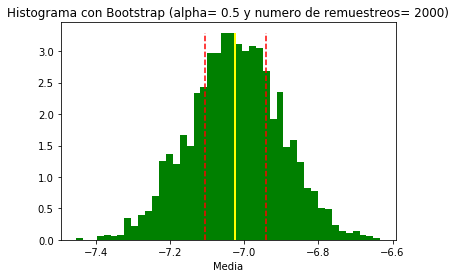

In [40]:
h=plt.hist(med,bins=int(np.sqrt(len(med))),density=1)
plt.hist(med,bins=int(np.sqrt(len(med))),density=1,color='green')
plt.vlines(alp1,0,max(h[0]),linestyle='dashed',color='red')
plt.vlines(alp2,0,max(h[0]),linestyle='dashed',color='red')
plt.vlines(promed,0,max(h[0]),linestyle='solid',color='yellow',lw=2)
plt.xlabel('Media')
plt.title('Histograma con Bootstrap (alpha= '+str(alp)+' y numero de remuestreos= '+str(N)+')')
plt.ion()
plt.show()
